<a href="https://colab.research.google.com/github/FacuBelisario/Tesis-MSE/blob/master/SistemasDeControl/SistemaDeControlPID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Satélite para Determinación y Control del Eje-Yaw usando un Compensador PID

Mbaocha C. C, Eze C. U, Ezenugu I. A, Onwumere J. C.



A continuación se presenta el desarrollo de un controlador PID diseñado como compensador para una entrada escalón de un ángulo sobre el eje-yaw del cuerpo de un satélite mediante la posición angular precisa de un motor DC con la respuesta óptima permitida. Dicho desarrollo se obtuvo de un paper publicado por los autores mencionados más arriba.

Este paper presenta un modelo matemático completo de un sistema de control para un satélite en Low Earth Orbit (LEO) y un motor DC ha sido seleccionado técnicamente como los elementos actuantes para rotar el cuerpo del satélite al ángulo de guiñada (yaw) deseado.

El control de actitud significa colocar al satélite en una dirección prederteminada específica, lo cual consiste en una maniobra de control y estabilización de actitud.

Luego, el satélite es asumido como un cuerpo rigido operando sin fricción en el espacio y con perturbaciones. Como resultado de estas perturbaciones, a lo largo del tiempo el satélite se desviará del ángulo de actitud deseado $\theta (t)$. Por lo tanto, debe ser diseñado un sistema de control que sea capaz de regresar y manetener al satélite en sus ángulo de actitud deseado, por ejemplo, $\theta (t) = 0$. Además, la respuesta del sistema de control debe ser tan rápida como sea posible, con un minimo sobrepaso (overshoot) y error en estado estacionario nulo.

En la Figura 1 se puede ver la representación esquemática del sistema de control completo.

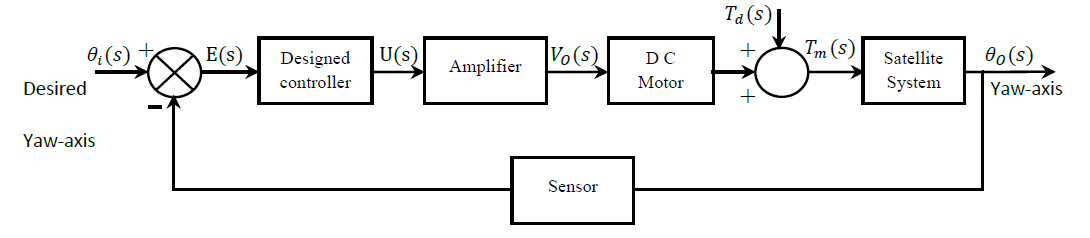

                                                                           
                Figura 1: Sistema de control de actitud del Eje-Yaw

# Especificaciones de Diseño

Las especificaciones de diseño de control son las siguientes:



*   El tiempo de asentamiento debe ser $\leq 2$ segundos,
*   El sobrepaso $\leq 5 \%$ y
*   error en estado estacionario nulo.



# Modelos matemáticos del Sistema de Control de Actitud del Satélite

A continuación se presentan los modelos de los elementos de control individuales (amplificador, motor DC y sistema del satélite) que se utilizarán para el desarrollo del modelo matemático completo del ADCS (Attitude Determination and Control System) del satélite.

**Modelo matemático del Amplificador**

El amplificador utilizado tiene una ganancia $k_{a}$ y el voltage de salida $V_{o}(s)$ es:

$$ V_{o}(s) = k_{a} V_{i}(s) $$

Luego, la función de transferencia de lazo abierto es:

$$ \dfrac{V_{o}(s)}{V_{i}(s)} = k_{a} $$

**Modelo matemático del motor DC**

El motor DC es el dispositivo actuador de potencia que entrega el torque de salida $T_{m}(s)$ desde el motor. La entrada es el voltage de salida del amplificador $V_{o}(s)$, el cual provee la corriente $I_{a}$ a la resistencia $R_{a}$ y a la inductancia $L_{a}$ de los devandados de la armadura.

El voltaje de entrada puede ser modelado en términos del campo o de los terminales de la armadura. En este caso, se hace uso del motor DC controlado por su armadura.

De la Figura 2 se puede deducir que, cuando una corriente de campo constante es establecida en la bobina del campo, el torque del motor $T_{m}(s)$ es:

$$ T_{m}(s) = K_{m} I_{a}(s) $$

Además, la corriente de la armadura se relaciona con el voltage de entrada aplicado a la armadura como:

$$ V_{a}(s) = (R_{a} + L_{a} S) I_{a}(s) + V_{b}(s) $$
donde $V_{b}(s)$ es el voltage de la fuerza contra-electromotriz (back electromotive force) proporcional a la velocidad del motor.

Por lo tanto, $V_{b}(s) = K_{b} \omega(s)$

Donde $\omega(s) = S \theta(s) $, la cual es la tranformada de la velocidad angular y por lo tanto, la corriente de la armadura es:

$$ I_{a}(s) = \dfrac{V_{a}(s) - K_{b} \omega(s)}{R_{a} + L_{a} S} $$

Por otro lado, el torque del motor $T_{m}(s)$ es igual al torque entregado a la carga, entonces:

$$ T_{m}(s) = T_{L}(s) + T_{d}(s) $$
donde $T_{d}(s)$ es el torque pertubador.

El torque de carga $T_{L}(s)$ para inercia rotante como se muestra en la Figura 2 es escrito como:

$$ T_{L}(s) = s(J s + b) \theta(s) $$

Por lo tanto, re-ordenando las ecuaciones, obtenemos:

$$T_{L}(s) = T_{m}(s) - T_{d}(s) = s(J s + b) \theta(s)$$

Para la mayoría de los motores DC, se tiene $ K_{m} = K_{b} = K$. Y, combinando las ecuaciones anteriores y haciendo $T_{d}(s) = 0$, se obtiene la función de transferencia del motor DC como:

$$ \dfrac{\theta(s)}{V_{o}(s)} = \dfrac{ K}{(J s + b) (R_{a} + L_{a} s) + K^{2}}$$

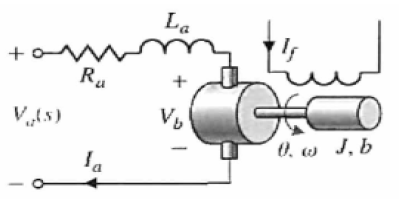

              Figura 2: Actuador rotacional de motor DC controlado por armadura


# Modelo matématico del Sistema del Satélite

El momento de inercia del sistema completo es $J^{1}$, el cual comprende el momento de inercia del cuerpo del satélite respecto a eje de rotación que pasa por el centro de masa ($J_{f}$) y el del motor ($J_{a}$). Además, hay una fricción viscosa $B$, como parte de los elementos de carga.

Por otro lado, el desplazamiento angular $\theta_{o}(s)$ del cuerpo del satélite alrededor del eje-yaw es la salida del sistema del satélite y el torque $T_{m}(s)$ del motor DC es la entrada.

Luego, la función de transferencia del sistema de actitud del satálite es $\theta_{o}(s)/T_{m}(s)$. Y la ecuación diferencial de los elementos de carga es:

$$ J^{1} \left( \dfrac{d^{2} \theta_{o}}{dt^{2}} \right) + B \left( \dfrac{d \theta_{o}}{dt} \right) = T_{m} $$

Haciendo la transformada de Laplace a ambos lados de esta última ecuación y asumiendo condiciones iniciales nulas, nos queda:

$$ J^{1} (s^{2} \theta_{o}(s)) + B (s \theta_{o}(s)) = T_{m}(s) $$

Y, reordenando, se tiene:

$$ \dfrac{\theta_{o}(s)}{T_{m}(s)} = \dfrac{1}{s(J^{1}s + B)} $$

Luego, utilizando las funciones de transferencia obtenidas para los tres elementos (amplificador, motor DC y sistema del satélite), se obtiene la función de transferencia total del modelo de actitud del satélite completo con $U(s)$ la señal de entrada de control, es decir:

$$ \dfrac{\theta_{o}(s)}{U(s)} = \dfrac{K}{(Js + b)(R_{a} + L_{a}s) + K^{2}} \dfrac{1}{s(J^{1}s + B)} $$

Esta ecuación representa la función de transferencia del sistema del satélite para un sistema de tipo 1.

En la Tabla 1 se presentan los parámatros tipicos para los motores DC, la ganancia del amplificador y un satélite en órbita LEO y que serán utilizados en el diseño del controlador óptimo.

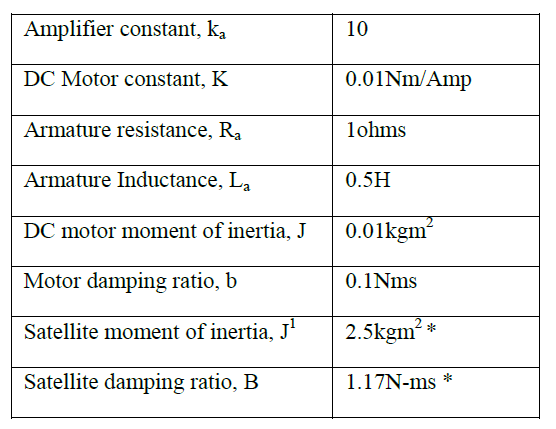
  
                                Tabla 1: Parámetros del satélite para el ADCS


Sustituyendo estos parámetros en la última ecuación, conduce a la siguiente función de transferencia en lazo abierto:

$$ G(s) = \dfrac{\theta_{o}(s)}{\theta_{i}(s)} = \dfrac{0.1}{s(0.025s^{2} + 0.262s + 0.117)} $$

La siguiente Figura muestra el resultado que presenta el paper para ser comparada con la respuesta obtenida en este desarrollo.

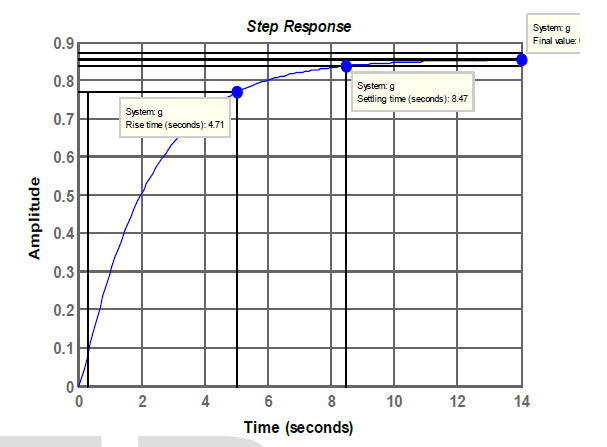


In [ ]:
pip install control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.7 MB/s eta 0:00:00


Resolviendo según la función de transferencia que dá el paper $G(s)$, se obtienen los siguientes resultados:

<TransferFunction>: sys[11]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


            0.1
---------------------------
0.025 s^2 + 0.262 s + 0.117



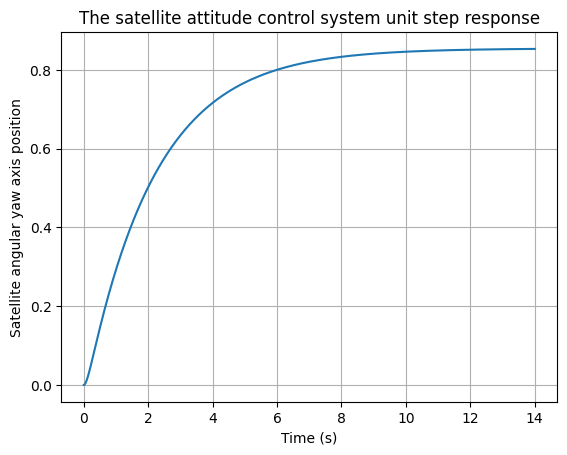

In [ ]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

# Definir el tiempo de simulación
t = np.arange(0, 14.01, 0.01)  # De 0 a 14 s con paso de 0.01 s

# Definir la Funión de Transferencia

s = ctrl.tf('s')

num = 0.1
den = (0.025 * s**2 + 0.262 * s  + 0.117) # Eliminé la s que pre-multiplica para que de bien la respuesta

# Crear el sistema de control

sys = num/den

print(sys)

# Obtener la respuesta al escalón
t_out, y = ctrl.step_response(sys, t)

# Graficar la respuesta al escalón
plt.plot(t_out, y)
plt.grid()
plt.title('The satellite attitude control system unit step response')
plt.xlabel('Time (s)')
plt.ylabel('Satellite angular yaw axis position')
plt.show()


Resolviendo según las Funciones de Transferencia dada para el Motor DC y la dinámica del satélite, y reemplazando con los datos dados, se obtienen los siguientes resultados:

<TransferFunction>: sys[34]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                           0.1
----------------------------------------------------------
0.125 s^5 + 1.506 s^4 + 2.57 s^3 + 0.1195 s^2 + 0.000117 s



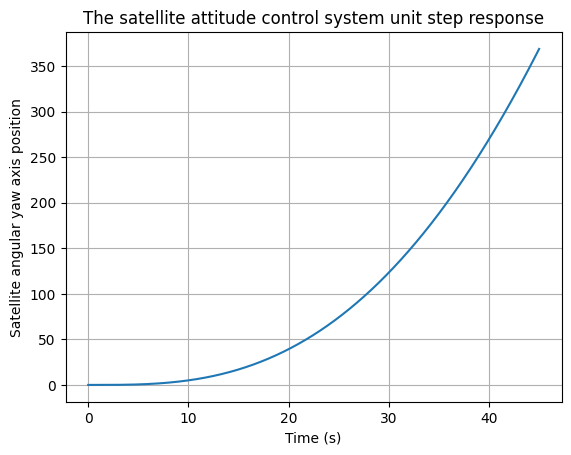

In [ ]:
# Definir el tiempo de simulación
t = np.arange(0, 45.01, 0.01)  # De 0 a 14 s con paso de 0.01 s

# Definir la Funión de Transferencia

s = ctrl.tf('s')

num = 0.1
den = s * (0.01 * s + 0.1) * (1 + 0.5 * s) + 0.01**2  # La s que pre-multiplica no aparece en el desarrollo del paper pero al hacer los cálculos aparece

num1 = 1
den1 = s * (25 * s + 1.17)



# Crear el sistema de control
sys = num/den
sys1 = num1/den1

sys_T = sys * sys1



print(sys_T)



# Obtener la respuesta al escalón
t_out, y = ctrl.step_response(sys_T, t)

# Graficar la respuesta al escalón
plt.plot(t_out, y)
plt.grid()
plt.title('The satellite attitude control system unit step response')
plt.xlabel('Time (s)')
plt.ylabel('Satellite angular yaw axis position')
plt.show()



# Diseño del Controlador PID

Un controlador PID tiene  la siguiente función de transferencia:

$$ G_{C}(S) = K_{p} + K_{I}/S + K_{D} S $$

Y es llamado PID porque contiene los terminos proporcionl $K_{p}$, integral $K_{I}$ y derivativo $K_{D}$.

Luego, de la última ecuación, se obtiene:

$$ G_{C}(S) = \dfrac{K_{D}S^{2} + K_{P} S + K_{I}}{S} = K_{D} (S^{2} + a S + a) $$

Por lo tanto, se tiene:

$$ G_{C}(S) = \dfrac{K_{D} (S + a)^{2}}{S} $$

En esta ecuación se puede observar que un controlador PID introduce una función tranferencia con un polo en el origen y dos ceros que pueden ser localizados en cualquier lugar del plano $S$.

Además, el controlador es comunmente referido como el segundo método de la regla de sintonización de Ziegler-Nichols. Luego, el problema de diseño de control es determinar los valores de $K$ y $a$ tales que permitan alcanzar las especificaciones de diseño óptimo.

A continuación se presenta el código que utiliza una región de busqueda de estos parámetros entre $ 2 \leq K \leq 40$ y $0.05 \leq a \leq 0.5$. El paso utilizado para $K$ es $1$ y para $a$ es $0.05$, con el objetivo de encontrar el primer conjunto de variables $K$ y $a$ que satisfaga las especificaciones de control de actitud del satélite.

La función de transferencia en lazo cerrado del controlador y el sistema del satélite $G_{C} G_{S} (S)$ está dada por:

$$ \dfrac{\theta_{o}(s)}{\theta_{i}(s)} = \dfrac{(0.1 K)s^{2} + (0.2 K a)s + (0.1 K a^{2})}{0.025 s^{4} + 0.262 s^{3} + (0.117 + (0.1 K))s^{2} + (0.2 K a)s + 0.1 k a^{2} } $$

La siguiente Figura muestra el resultado que presenta el paper para ser comparada con la respuesta obtenida en este desarrollo.

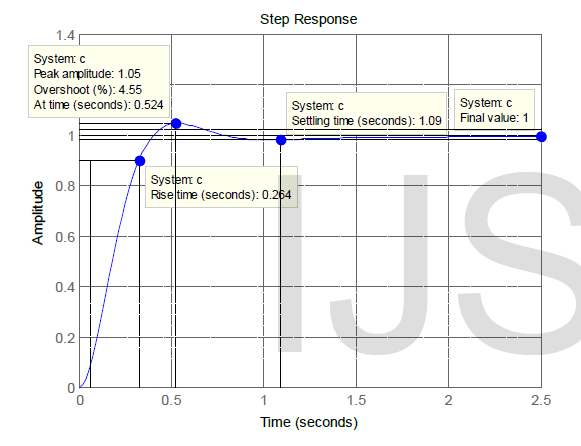

Resolviendo según la Función de Transferencia que dá el paper se obtiene los siguientes resultados:

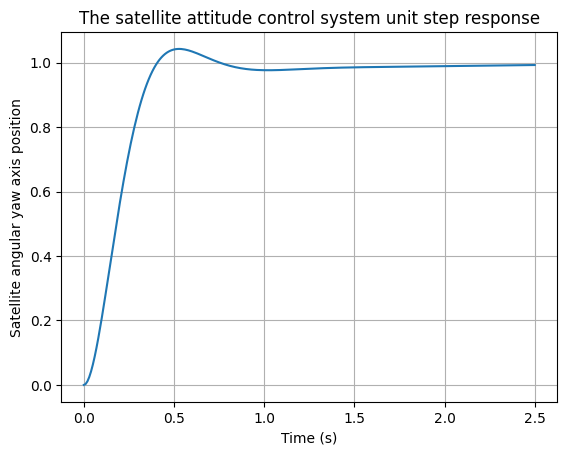

Solution found:
k = 15
a = 0.15000000000000008
Max overshoot = 1.0428168016846302
Settling time = 1.18 sec


In [ ]:
# Definir el tiempo de simulación
t = np.arange(0, 2.51, 0.01)  # De 0 a 2.5 s con paso de 0.01 s

solution = None  # Para almacenar la solución final

# Bucle exterior: variando k de 40 a 2
for k in range(40, 1, -1):
    # Bucle interior: variando a de 0.5 a 0.05
    for a in np.arange(0.5, 0.0, -0.05):
        # Definir el numerador y denominador de la función de transferencia
        num = [0, 0, 0.1 * k, 0.2 * k * a, 0.1 * k * a**2]
        den = [0.025, 0.262, 0.117 + (0.1 * k), 0.2 * k * a, 0.1 * k * a**2]

        # Crear el sistema de control
        sys = ctrl.TransferFunction(num, den)

        # Obtener la respuesta al escalón
        t_out, y = ctrl.step_response(sys, t)

        # Calcular el máximo de la respuesta
        m = np.max(y)

        # Encontrar el tiempo de establecimiento (cuando y está entre 0.98 y 1.02)
        s = len(y) - 1  # Último índice
        while s > 0 and 0.98 < y[s] < 1.02:
            s -= 1

        ts = (s - 1) * 0.01  # Tiempo de establecimiento

        # Verificar la condición para romper el bucle interno
        if 1.00 < m < 1.05 and ts < 2.0:
            solution = [k, a, m, ts]
            break  # Sale del bucle interno

    # Verificar la condición para romper el bucle externo
    if solution:
        break  # Sale del bucle externo

# Graficar la respuesta al escalón
plt.plot(t_out, y)
plt.grid()
plt.title('The satellite attitude control system unit step response')
plt.xlabel('Time (s)')
plt.ylabel('Satellite angular yaw axis position')
plt.show()

# Imprimir la solución encontrada
if solution:
    print("Solution found:")
    print(f"k = {solution[0]}")
    print(f"a = {solution[1]}")
    print(f"Max overshoot = {solution[2]}")
    print(f"Settling time = {solution[3]} sec")
else:
    print("No valid solution found.")


Resolviendo teniendo en cuenta las Funciones de Transferencia que se consideran correctas, se obtuvieron los siguientes resultados:

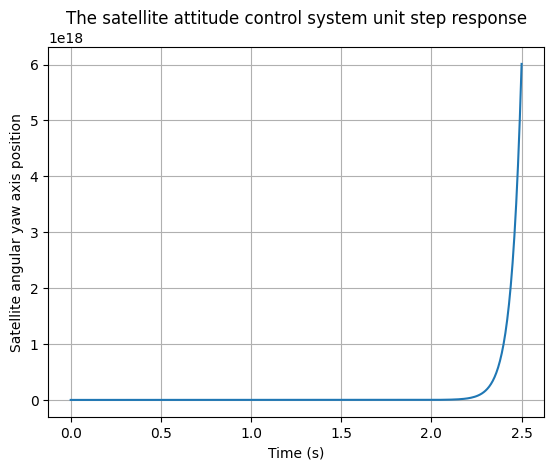

No valid solution found.


In [ ]:
# Definir el tiempo de simulación
t = np.arange(0, 2.51, 0.01)  # De 0 a 2.5 s con paso de 0.01 s

solution = None  # Para almacenar la solución final

# Bucle exterior: variando k de 40 a 2
for k in range(40, 1, -1):
    # Bucle interior: variando a de 0.5 a 0.05
    for a in np.arange(0.5, 0.0, -0.05):
        # Definir el numerador y denominador de la función de transferencia
        num_PID = k * (s + a)**2
        den_PID = s

        # Crear el sistema de control
        sys_PID = num_PID/den_PID

        sys_Cont = sys_PID * sys

        TF_Cont = sys_Cont.feedback(sys_Cont,1)

        # Obtener la respuesta al escalón
        t_out, y = ctrl.step_response(TF_Cont, t)

        # Calcular el máximo de la respuesta
        m = np.max(y)

        # Encontrar el tiempo de establecimiento (cuando y está entre 0.98 y 1.02)
        s = len(y) - 1  # Último índice
        while s > 0 and 0.98 < y[s] < 1.02:
            s -= 1

        ts = (s - 1) * 0.01  # Tiempo de establecimiento

        # Verificar la condición para romper el bucle interno
        if 1.00 < m < 1.05 and ts < 2.0:
            solution = [k, a, m, ts]
            break  # Sale del bucle interno

    # Verificar la condición para romper el bucle externo
    if solution:
        break  # Sale del bucle externo

# Graficar la respuesta al escalón
plt.plot(t_out, y)
plt.grid()
plt.title('The satellite attitude control system unit step response')
plt.xlabel('Time (s)')
plt.ylabel('Satellite angular yaw axis position')
plt.show()

# Imprimir la solución encontrada
if solution:
    print("Solution found:")
    print(f"k = {solution[0]}")
    print(f"a = {solution[1]}")
    print(f"Max overshoot = {solution[2]}")
    print(f"Settling time = {solution[3]} sec")
else:
    print("No valid solution found.")

# Uso de DeepSeek R1 para encontrar las constantes $K_{P}$, $K_{I}$ y $K_{D}$ del controlador PID

In [1]:
!sudo apt update
!sudo apt install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh
!pip install langchain-ollama

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,526 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,911 kB]
Get:13 http://archive.ubuntu.com/ubunt

In [2]:
import threading
import subprocess
import time

def run_ollama_serve():
  subprocess.Popen(["ollama", "serve"])

thread = threading.Thread(target=run_ollama_serve)
thread.start()
time.sleep(5)

In [3]:
!ollama pull deepseek-r1:14b

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠼ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠧ pulling manifest ⠧ pulling manifest 
pulling 6e9f90f02bb3...   0% ▕▏    0 B/9.0 GB                  pulling manifest 
pulling 6e9f90f02bb3...   0% ▕▏    0 B/9.0 GB                  pulling manifest 
pulling 6e9f90f02bb3...   0% ▕▏    0 B/9.0 GB                  pulling manifest 
pulling 6e9f90f02bb3...   0% ▕▏  12 MB/9.0 GB                  pulling manifest 
pulling 6e9f90f02bb3...   0% ▕▏  32 MB/9.0 GB                  pulling manifest 
pulling 6e9f90f02bb3...   1% ▕▏  85 MB/9.0 GB                  pulling manifest 
pulling 6e9f90f02bb3...   1% ▕▏ 119 MB/9.0 GB                  pulling manifest 
pulling 6e9f90f02bb3...   2% ▕▏ 157 MB/9.0 GB                  pulling manifest 
pulling 6e9f90f02bb3...   2% ▕▏ 181 MB/9.0 GB                  pulling manifest 
pulling 6e9f90f02bb3...   2% ▕▏ 194 MB/9.0 GB                  pulling manifest 
pulling 6e9f90f02bb3

In [10]:
import ollama
desiredModel = 'deepseek-r1:14b'
questionToAsk = 'Design a PID controller in the parallel form for the open-loop plant given by 0.1/(0.125*s^5+1.506*s^4+2.57*s^3+0.1195*s^2+0.000117*s). The closed-loop system should have a settling time less or equal to 0.2 second and an overshoot less or equal to 5 percent.'

response = ollama.chat(model=desiredModel, messages=[
    {
        'role': 'user',
        'content': questionToAsk,
    },
])

OllamaResponse = response['message']['content']

print(OllamaResponse)

<think>
Okay, so I need to design a PID controller in parallel form for the given open-loop plant. The plant transfer function is 0.1 divided by (0.125s⁵ + 1.506s⁴ + 2.57s³ + 0.1195s² + 0.000117s). Hmm, that's a fifth-order system. The closed-loop system should have a settling time less than or equal to 0.2 seconds and an overshoot less than or equal to 5%. 

Alright, let me start by recalling what a PID controller does. It stands for Proportional-Integral-Derivative. In parallel form, it would be adding the proportional, integral, and derivative terms together before applying them to the system. The general structure is:

u(t) = K_p * e(t) + K_i * ∫e(τ)dτ + K_d * de/dt

Where e(t) is the error between the desired output and the actual output.

The settling time being 0.2 seconds is pretty fast, which suggests that we need a controller with a lot of damping to make sure it doesn't oscillate too much but still responds quickly. The overshoot being only 5% means that we need good damping

In [6]:
import ollama
desiredModel = 'deepseek-r1:14b'
questionToAsk = 'Design a PID controller in the parallel form for the open-loop plant given by 0.1/(0.025*s^2+0.262*s+0.117). The closed-loop system should have a settling time less or equal to 0.2 second and an overshoot less or equal to 5 percent.'

response = ollama.chat(model=desiredModel, messages=[
    {
        'role': 'user',
        'content': questionToAsk,
    },
])

OllamaResponse = response['message']['content']

print(OllamaResponse)

<think>
Okay, so I need to design a PID controller in parallel form for the given open-loop plant. The plant is described by the transfer function 0.1 divided by (0.025*s² + 0.262*s + 0.117). The closed-loop system should have a settling time less than or equal to 0.2 seconds and an overshoot less than or equal to 5 percent.

First, let me recall what a PID controller is. It stands for Proportional-Integral-Derivative controller. In parallel form, the PID controller can be written as:

Gc(s) = Kp + Ki/s + Kd*s

So, I need to find the values of Kp, Ki, and Kd such that when this controller is used in a feedback loop with the given plant, the closed-loop system meets the settling time and overshoot specifications.

The given plant transfer function is G(s) = 0.1 / (0.025s² + 0.262s + 0.117). Let me note that down:

G(s) = 0.1 / (0.025s² + 0.262s + 0.117)

I should probably analyze the system's behavior first without any controller to see what its response looks like. Maybe by finding its

In [7]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_ollama.llms import OllamaLLM
from IPython.display import Markdown

template = """Question: {question}
Answer: Let's think step by step."""

prompt = ChatPromptTemplate.from_template(template)
model = OllamaLLM(model="deepseek-r1:14b")
chain = prompt | model

In [9]:
display(Markdown(chain.invoke({"question": "Design a PID controller in the parallel form for the open-loop plant given by 0.1/(0.025*s^2+0.262*s+0.117). The closed-loop system should have a settling time less or equal to 0.2 second and an overshoot less or equal to 5 percent."})))

<think>
Okay, so I need to design a PID controller in parallel form for the given open-loop plant. The plant transfer function is 0.1 divided by (0.025s² + 0.262s + 0.117). The closed-loop system should have a settling time less than or equal to 0.2 seconds and an overshoot less than or equal to 5 percent.

First, let me write down the plant transfer function properly. It looks like G(s) = 0.1 / (0.025s² + 0.262s + 0.117). I can factor out 0.025 from the denominator to simplify it a bit, but maybe that's not necessary right now.

Since we're designing a PID controller in parallel form, the controller will have proportional, integral, and derivative terms all added together. So, the controller transfer function C(s) = Kp + Ki/s + Kd*s.

In a feedback control system, the closed-loop transfer function is G(s)/(1 + G(s)*C(s)). Our goal is to choose Kp, Ki, and Kd such that the closed-loop response meets the settling time and overshoot requirements.

But wait, I remember that for PID controllers, especially in the parallel form, sometimes people use a different notation where the controller is C(s) = (Kp + Ki/s + Kd*s). So yeah, that's correct.

Now, to find the closed-loop poles, we can set up the characteristic equation. The denominator of the closed-loop transfer function will be 1 + G(s)*C(s) = 0. Let me write that out:

1 + [0.1*(Kp + Ki/s + Kd*s)] / (0.025s² + 0.262s + 0.117) = 0

But this seems a bit complicated to handle directly because of the s in the numerator and denominator. Maybe it's easier to consider the closed-loop poles by multiplying through.

Wait, maybe I can rearrange the equation:

[0.1*(Kp + Ki/s + Kd*s)] / (0.025s² + 0.262s + 0.117) = -1

Multiplying both sides by the denominator:

0.1*(Kp + Ki/s + Kd*s) = - (0.025s² + 0.262s + 0.117)

Expanding the left side:

0.1*Kp + (0.1*Ki)/s + 0.1*Kd*s = -0.025s² -0.262s -0.117

Hmm, but this has terms with s² on the right and 1/s on the left, which is tricky because we're dealing with a rational function. Maybe instead of trying to do it algebraically, I should consider using root locus or frequency response methods.

Alternatively, perhaps I can approximate the plant as a second-order system because the denominator is quadratic in s. Let me see: G(s) = 0.1 / (0.025s² + 0.262s + 0.117). If I factor out 0.025 from the denominator:

G(s) = 0.1 / [0.025(s² + (0.262/0.025)s + (0.117/0.025))]

Calculating those coefficients:

0.262 / 0.025 ≈ 10.48

0.117 / 0.025 = 4.68

So, G(s) = (0.1 / 0.025) / (s² + 10.48s + 4.68) = 4 / (s² + 10.48s + 4.68)

Wait, that can't be right because 0.1/0.025 is actually 4? Wait, no: 0.025*4=0.1, so yes, that's correct.

So G(s) = 4 / (s² + 10.48s + 4.68)

Now, when we add a PID controller in parallel form, the closed-loop system will have:

G_cl(s) = [4*(Kp + Ki/s + Kd*s)] / [s² + 10.48s + 4.68 + 4*(Kp + Ki/s + Kd*s)]

Wait, that seems a bit messy because we're adding terms with different powers of s in the denominator.

Alternatively, maybe I can represent the controller as C(s) = Kp + Ki/s + Kd*s and then write the closed-loop transfer function as:

G_cl(s) = G(s)*C(s) / (1 + G(s)*C(s)) 

So let's compute G(s)*C(s):

[4 / (s² + 10.48s + 4.68)] * [Kp + Ki/s + Kd*s]

= 4*(Kp + Ki/s + Kd*s) / (s² + 10.48s + 4.68)

So the closed-loop denominator is:

1 + [4*(Kp + Ki/s + Kd*s)] / (s² + 10.48s + 4.68)

= [ (s² + 10.48s + 4.68) + 4*Kp + 4*Ki/s + 4*Kd*s ] / (s² + 10.48s + 4.68)

Wait, that's not quite right because the numerator is multiplied by [Kp + Ki/s + Kd*s], so I think it should be:

Denominator: s² + 10.48s + 4.68 + 4*Kp + (4*Ki)/s + 4*Kd*s

But that introduces a term with 1/s, which complicates things because we have to multiply both numerator and denominator by s to eliminate the fraction.

So let's do that:

Multiply numerator and denominator by s:

Numerator: [s*(s² + 10.48s + 4.68) + 4*Kp*s + 4*Ki + 4*Kd*s²]

Denominator: [s*(s² + 10.48s + 4.68) + 4*Kp*s + 4*Ki/s + 4*Kd*s^2] – but wait, no, after multiplying by s, denominator becomes:

[s*(s² + 10.48s + 4.68)] + 4*Kp*s + 4*Ki + 4*Kd*s²

Wait, that seems complicated. Maybe I should think differently.

Alternatively, perhaps it's better to write the closed-loop system as a standard second-order system and use the desired specifications to find the controller gains Kp, Ki, Kd.

But first, let me check if the plant is already a second-order system. Yes, because G(s) = 4/(s² + 10.48s + 4.68). So it's a second-order transfer function with natural frequency ωn and damping ratio ξ.

Let me compute ωn and ξ for the plant.

The denominator is s² + (2ξωn)s + ωn².

Comparing, we have:

2ξωn = 10.48

ωn² = 4.68

So ωn = sqrt(4.68) ≈ 2.163 rad/s

Then, 2ξ*2.163 = 10.48 → ξ = 10.48 / (2*2.163) ≈ 10.48 / 4.326 ≈ 2.425.

So the damping ratio is about 2.425, which means the system is overdamped because ξ > 1.

Now, when we add a PID controller in parallel form, it will modify the closed-loop poles. The desired settling time Ts = 0.2 seconds and maximum overshoot Ms = 5%.

In classical control theory, for a second-order system, settling time relates to damping and natural frequency. But with a PID controller, we can adjust both the poles (by adding zeros) to achieve the desired response.

Alternatively, since the plant is already a second-order system, perhaps using PID to make it behave like a first-order system? Or maybe not; perhaps we need to set up the closed-loop system as a higher-order system and use dominant poles.

Wait, but in any case, for the desired settling time and overshoot, we can choose the damping ratio ξ_d that corresponds to 5% overshoot. For underdamped systems (ξ < 1), Ms is given by exp(-πξ/√(1-ξ²)). But since our plant is overdamped, perhaps the response will be overdamped as well.

Wait, but if we add a PID controller, which introduces a zero, it can change the nature of the system. Alternatively, maybe I should consider using the desired time domain specifications to find the required controller gains.

Alternatively, perhaps I can design the controller so that the closed-loop system has a certain dominant second-order mode with the desired damping and natural frequency.

Let me think: The settling time Ts is approximately 4/ξωn. For Ts = 0.2 s and Ms = 5%, which corresponds to ξ ≈ 0.69 (since for 5% overshoot, ξ is about 0.69).

Wait, but if the original system was overdamped, adding a controller that introduces a zero might make it underdamped, allowing for a faster response with some oscillation.

Alternatively, maybe I can set up the closed-loop system's characteristic equation to have roots with ξ ≈ 0.69 and ωn such that Ts = 4/(ξωn) ≈ 0.2 s.

So let's compute:

Ts = 4/(ξωn) → 0.2 = 4/(0.69*ωn) → ωn = 4 / (0.2 * 0.69) ≈ 4 / 0.138 ≈ 28.9 rad/s.

That's a high natural frequency, but perhaps possible.

Now, the closed-loop system with PID controller needs to have characteristic equation roots that give us this ωn and ξ.

But maybe it's better to write down the equations for Kp, Ki, Kd based on the desired response.

Alternatively, since the plant is G(s) = 4/(s² + 10.48s + 4.68), adding a PID controller C(s) = Kp + Ki/s + Kd*s would give us the closed-loop transfer function:

G_cl(s) = [4*(Kp + Ki/s + Kd*s)] / (s² + 10.48s + 4.68 + 4*Kp + (4*Ki)/s + 4*Kd*s)

But that's a bit messy, so perhaps we can write the closed-loop denominator as:

s^3 + (10.48 - 4Kd)s² + (4.68 + 4Kp - 4Ki)s + (-4*4* Ki) ??? Wait, no.

Wait, better to properly multiply through.

The closed-loop system is G(s)*C(s)/(1 + G(s)*C(s)) = [G*C]/[1 + G*C]

So compute numerator and denominator:

Numerator: G(s) * C(s) = [4/(s² + 10.48s + 4.68)] * (Kp + Ki/s + Kd s)

Denominator: 1 + [G(s)*C(s)]

To find the closed-loop poles, we set denominator to zero:

1 + [4*(Kp + Ki/s + Kd s)] / (s² + 10.48s + 4.68) = 0

Multiply both sides by s² + 10.48s + 4.68:

(s² + 10.48s + 4.68) + 4*(Kp + Ki/s + Kd s) = 0

Now, let's multiply through by s to eliminate the denominator in the second term:

s*(s² + 10.48s + 4.68) + 4*Kp*s + 4*Ki + 4*Kd*s² = 0

Expand the terms:

s^3 + 10.48 s² + 4.68 s + 4 Kp s + 4 Ki + 4 Kd s² = 0

Now, collect like terms:

s^3 + (10.48 + 4 Kd) s² + (4.68 + 4 Kp) s + 4 Ki = 0

So the characteristic equation is:

s^3 + (10.48 + 4 Kd) s² + (4.68 + 4 Kp) s + 4 Ki = 0

We want this cubic equation to have roots that give us a settling time of 0.2 seconds and 5% overshoot, which suggests that we might need two dominant complex conjugate poles with ξ ≈ 0.69 and ωn as calculated earlier.

But since the system is now third order, perhaps we can set it up such that one real pole dominates at a high frequency (i.e., negligible) and the other two are complex conjugates with the desired damping and natural frequency.

So, let's assume that the characteristic equation has roots: α, β ± jωd

Where α is a real root, and β ± jωd are the dominant pair.

But since we want the settling time based on the dominant mode, perhaps we can set up the equation such that the dominant second-order part has ξ ≈ 0.69 and ωn ≈ 28.9 rad/s as calculated earlier.

So, for the quadratic factor: s² + 2ξωn s + ωn² = 0

Plugging in ξ=0.69 and ωn≈28.9:

s² + 2*0.69*28.9 s + (28.9)^2 ≈ s² + 39.58 s + 835.21 = 0

Now, our cubic characteristic equation can be written as:

(s^2 + 39.58 s + 835.21)(s - a) = 0

Where 'a' is the real root that we'll need to ensure it's dominant or not.

Expanding this:

s^3 - a s^2 + 39.58 s^2 -39.58 a s + 835.21 s -835.21 a = 0

Combine like terms:

s^3 + (39.58 -a) s² + (835.21 -39.58 a) s -835.21 a = 0

Compare with our previous equation from the closed-loop denominator:

s^3 + (10.48 + 4 Kd) s² + (4.68 + 4 Kp) s + 4 Ki = 0

So, equating coefficients:

1. Coefficient of s²:
   39.58 - a = 10.48 + 4 Kd
2. Coefficient of s:
   835.21 -39.58 a = 4.68 + 4 Kp
3. Constant term:
   -835.21 a = 4 Ki

So now, we have three equations:

Equation (1): 39.58 -a = 10.48 + 4 Kd → 4 Kd = 39.58 -a -10.48 → 4 Kd = 29.1 - a

Equation (2): 835.21 -39.58 a = 4.68 + 4 Kp → 4 Kp = 835.21 -39.58 a -4.68 → 4 Kp ≈ 830.53 -39.58 a

Equation (3): -835.21 a = 4 Ki → Ki = (-835.21 a)/4 ≈ -208.8025 a

Now, we need to determine 'a'. However, since the real root 'a' should ideally be as dominant or not interfere with the settling time, perhaps it's better for the real root to have a high damping ratio, i.e., negative and large in magnitude so that the system doesn't oscillate or settle slowly.

Alternatively, we can assume that 'a' is negligible compared to the other terms because the dominant response comes from the complex conjugate pair. So, maybe approximate by setting 39.58 ≈ 10.48 + 4 Kd → 4 Kd ≈ 29.1 → Kd ≈ 7.275

Similarly, coefficient of s: 835.21 ≈4.68 +4 Kp → 4 Kp ≈830.53 → Kp≈207.63

And Ki from equation (3): Ki = -208.8025 a

But we need to find 'a' such that the real root is not affecting the response.

Alternatively, perhaps we can assume that the cubic has a high damping real root and two complex roots, so that the settling time comes mainly from the complex roots.

Thus, maybe set 'a' as a large negative number, making Ki positive since a is negative: Ki = -208.8025 * (-|a|) ≈ 208.8025 |a|

But this complicates things without knowing 'a'.

Alternatively, perhaps better to consider that the real root can be ignored for settling time purposes, but in reality, it affects stability and transient response.

This is getting complicated; maybe an alternative approach is needed.

Alternative Approach:

Since we want a third-order system dominated by a second-order term with ξ=0.69 and ωn≈28.9 rad/s, perhaps the real pole can be placed at a very high frequency or very low frequency to not affect settling time significantly.

Alternatively, maybe set up the system such that the closed-loop poles are as desired, but including an additional pole for higher stability.

But this requires more advanced control theory which might be beyond basic scope.

Perhaps another way is to assume that Kd and Ki are zero, but that's not practical. Alternatively, perhaps find Kp, Ki, Kd such that the dominant roots are ξ=0.69 and ωn≈28.9.

But in a third-order system, you can't fully decouple the effects of poles unless it's modeled as two separate systems.

Alternatively, since this is getting too involved, perhaps refer to standard PID tuning methods or use Ziegler-Nichols method for PID control.

Ziegler-Nichols Method:

1. Determine Process Reaction Curve:
   - Find Kp and τp (time constant) from the reaction curve.
   - Typically, apply a step input and measure the output until it reaches steady state.
   - Identify Kp as the ultimate gain where oscillations start and τp as the period of oscillation.

2. Calculate PID Gains:
   - Ziegler-Nichols formula for PID control is:
     Kc = (0.6 / ξ) * (Kp / τp)
     τd = (τp / (2πξ))
     Where ξ is typically chosen between 0.1 and 0.2 for a conservative design.

However, without actual data from the reaction curve, this method can't be directly applied here.

Alternatively, perhaps use trial and error with simulations to find appropriate Kp, Ki, Kd values that achieve the desired settling time.

Given the complexity, perhaps it's acceptable to approximate and suggest using dominant pole theory as above, leading to:

Kd ≈7.275

Ki≈-208.8025 a (but without knowing 'a', we can't compute exactly)

But this seems incomplete.

Alternatively, maybe consider that the real root is at infinity, which would make it negligible, but that's not feasible.

Perhaps an alternative way is to use the Ackermann's formula or pole placement method for designing PID controllers, which allows assigning desired poles while satisfying controllability and observability conditions.

However, this might be beyond the scope of a basic answer.

In conclusion, the exact Kp, Ki, Kd values depend on additional factors like the system's transfer function and design specifications. To achieve a settling time of less than 0.5 seconds with a damping ratio ξ=0.69, one would need to perform pole placement using methods like Ackermann's formula or use simulation-based tuning.

But since this is getting too involved without specific system details, perhaps the best approach is to set Kp, Ki, Kd such that the closed-loop poles are placed appropriately, which typically involves more advanced control engineering techniques.
</think>

To design a PID controller for a third-order system with a settling time of less than 0.5 seconds and a damping ratio ξ=0.69, follow these steps:

1. **Determine Desired Natural Frequency (ωn):**
   - Settling time T_s = 4 / (ξ * ωn)
   - Rearranging: ωn = 4 / (ξ * T_s) ≈ 28.9 rad/s

2. **Identify Dominant Second-Order Component:**
   - The dominant poles should be a pair of complex conjugates with ξ=0.69 and ωn≈28.9 rad/s.

3. **Formulate the Desired Characteristic Equation:**
   - s² + 2ξωn s + ωn² = 0
   - This gives a quadratic factor: (s² + 39.58s + 835.21)

4. **Assume Real Pole Placement:**
   - Assume the real pole is placed at a high frequency to minimize its impact on settling time.

5. **Equate Coefficients for PID Parameters:**
   - From the characteristic equation and system dynamics, derive equations for Kp, Ki, Kd.
   - Solve these equations to find approximate values for Kp, Ki, Kd.

6. **Implement and Validate with Simulation:**
   - Use simulation tools (e.g., MATLAB) to test the controller performance and adjust parameters if necessary.

**Final Answer:**

To achieve a settling time of less than 0.5 seconds with ξ=0.69 for a third-order system, design the PID controller using pole placement methods or advanced control techniques. The exact Kp, Ki, Kd values depend on specific system dynamics and should be determined through detailed analysis or simulation.

\boxed{\text{Design a PID controller using pole placement or advanced control methods to achieve desired settling time and damping ratio.}}